# Scaling Numeric Data
## Exercises


### Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

4) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

5) Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

(2134889, 8)
(2096851, 8)


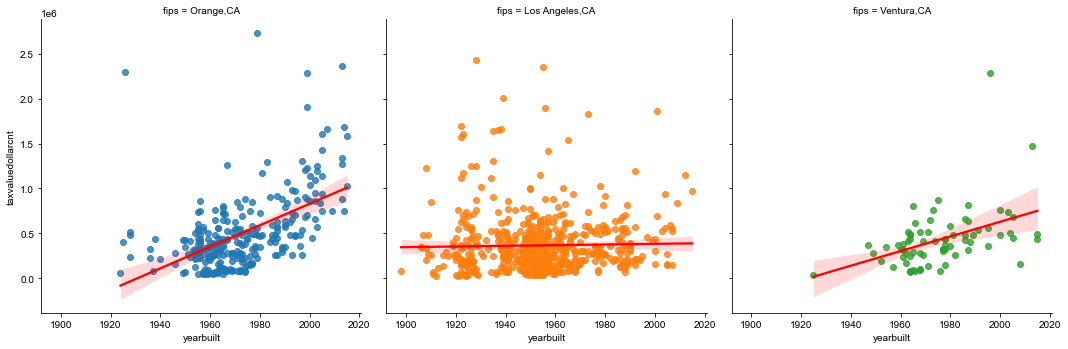

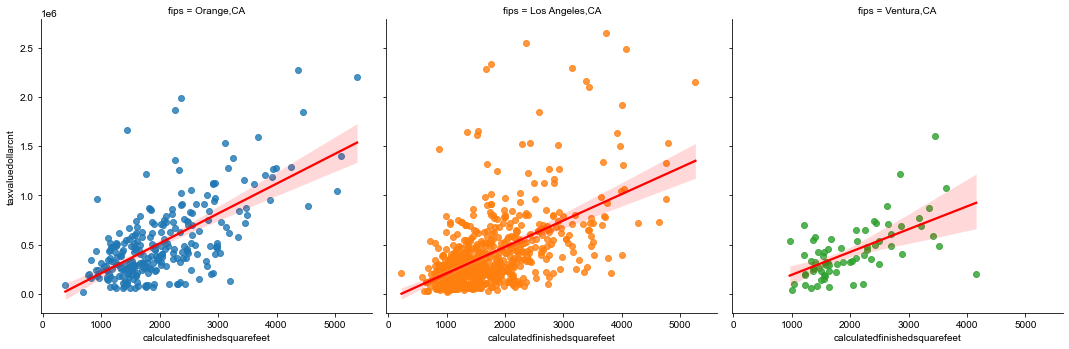

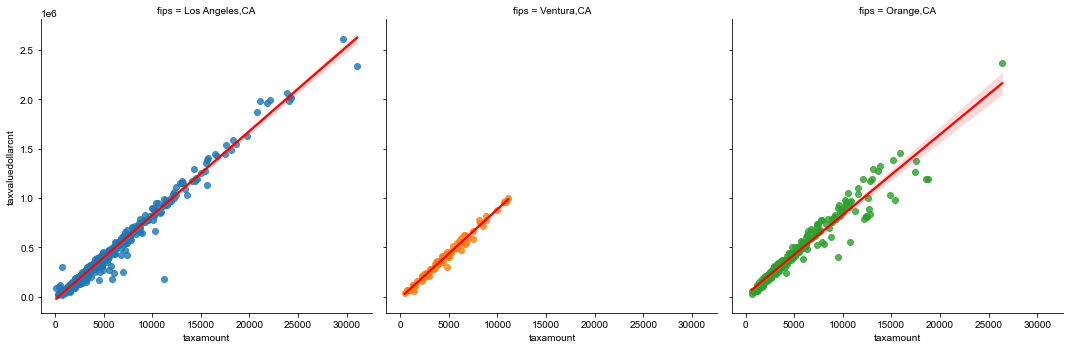

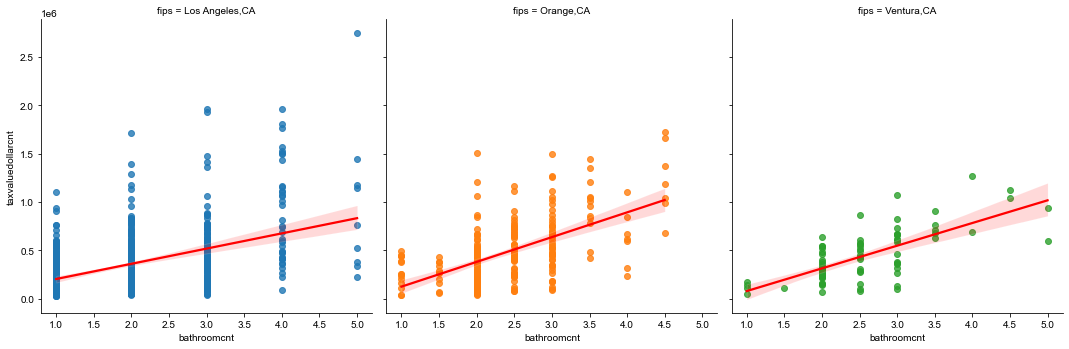

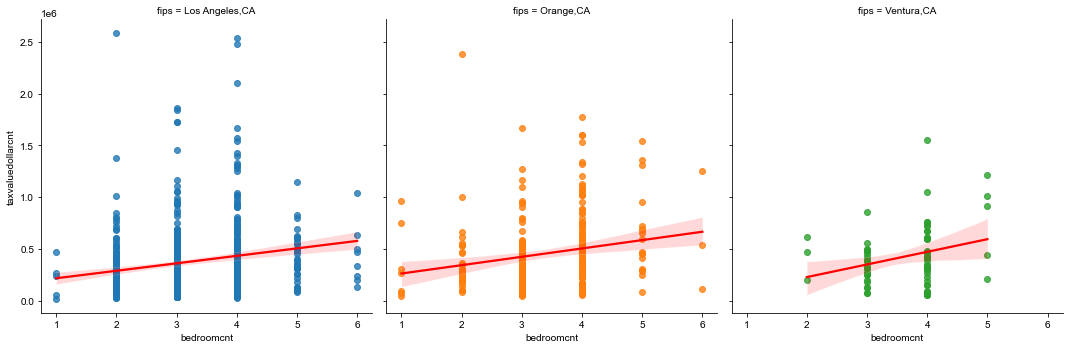

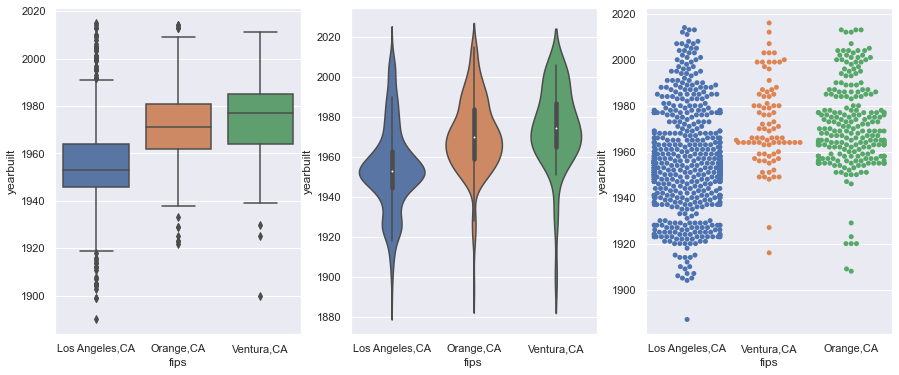

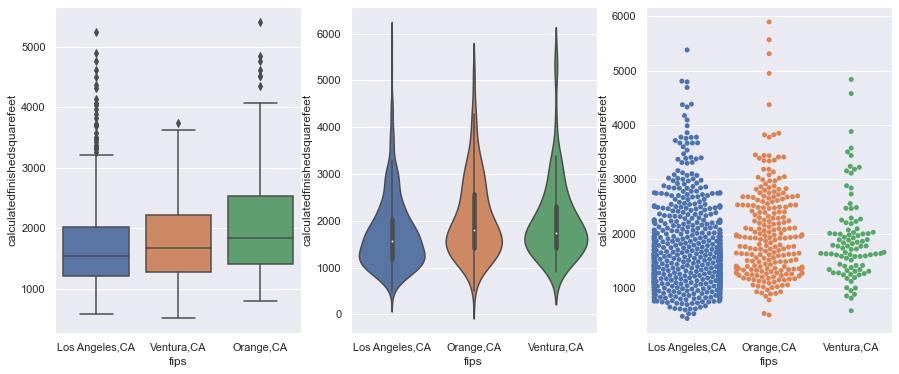

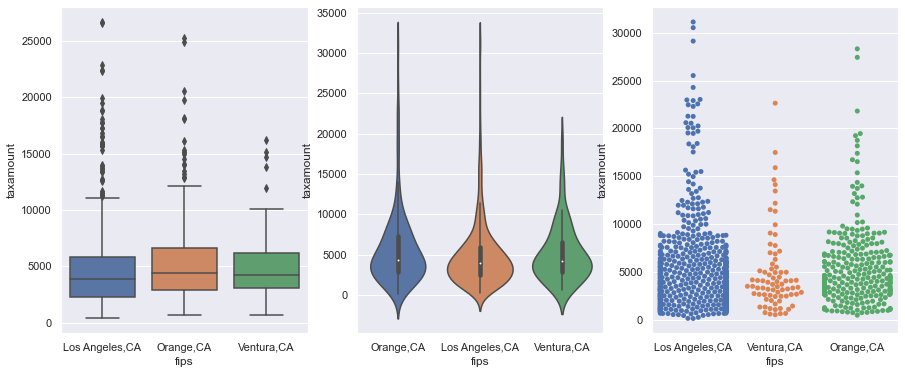

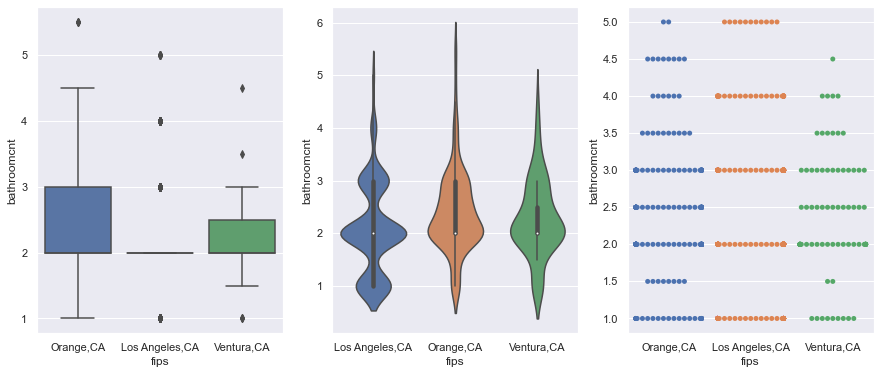

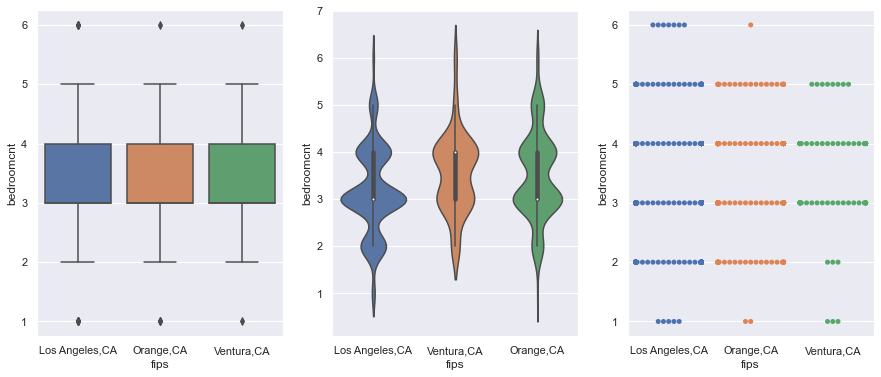

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
import scipy
import os
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import wrangle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer


In [2]:
train = wrangle.train
validate = wrangle.validate
test = wrangle.test

### visualizing split data train, validate, and test 

In [3]:
train

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1349905,11911489,6.0,3.0,2449.0,432773.0,1947,5931.25,"Los Angeles,CA"
258766,17138706,3.0,2.0,1599.0,211452.0,1976,2261.32,"Ventura,CA"
1244806,12815284,4.0,3.0,1969.0,380466.0,1965,4570.03,"Los Angeles,CA"
667578,14105307,5.0,2.5,2085.0,202010.0,1955,2527.40,"Orange,CA"
882530,11010017,6.0,5.0,4922.0,1107030.0,2002,13622.19,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...
728188,12823382,3.0,2.0,1545.0,327671.0,1951,4082.33,"Los Angeles,CA"
1285982,12199184,2.0,1.0,1656.0,32357.0,1909,940.08,"Los Angeles,CA"
1929500,11345782,4.0,3.0,2544.0,514071.0,1999,6987.84,"Los Angeles,CA"
1770542,12300227,4.0,3.0,2512.0,399925.0,1947,5213.92,"Los Angeles,CA"


In [4]:
validate

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1412298,11016387,3.0,2.0,1854.0,283044.0,1961,3601.36,"Los Angeles,CA"
1641778,12378229,2.0,3.0,1153.0,198634.0,1923,3309.64,"Los Angeles,CA"
334609,10763511,3.0,2.0,1530.0,219055.0,1951,2755.15,"Los Angeles,CA"
1444550,10994385,3.0,2.0,1183.0,445278.0,1951,5357.36,"Los Angeles,CA"
1598351,12238672,3.0,1.0,1104.0,38266.0,1953,961.10,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...
1438910,12869522,3.0,2.0,1148.0,476000.0,1952,5805.97,"Los Angeles,CA"
779459,12078574,4.0,4.0,2984.0,843019.0,1989,9256.81,"Los Angeles,CA"
791688,12484901,3.0,1.0,1138.0,72854.0,1950,1176.86,"Los Angeles,CA"
1243004,12250497,2.0,1.0,640.0,44794.0,1921,722.00,"Los Angeles,CA"


In [5]:
test

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1489530,11756252,3.0,1.0,1709.0,456955.0,1923,5586.16,"Los Angeles,CA"
733304,10816182,4.0,3.0,2398.0,384626.0,1950,4737.45,"Los Angeles,CA"
162905,10846793,2.0,1.0,1014.0,89135.0,1948,1114.93,"Los Angeles,CA"
1637601,10797523,2.0,3.0,2416.0,800000.0,1954,9730.20,"Los Angeles,CA"
221776,12771827,4.0,2.0,1955.0,174264.0,1978,2405.11,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...
1668235,14328284,4.0,3.0,2407.0,852619.0,2004,11417.46,"Orange,CA"
1580991,14199403,3.0,2.0,1680.0,315671.0,1984,3906.66,"Orange,CA"
1305535,11317009,3.0,2.0,1080.0,141451.0,1992,2528.86,"Los Angeles,CA"
1408656,14145336,4.0,3.0,2789.0,163057.0,1962,2036.84,"Orange,CA"


***

### shape of train, test, and validate

In [6]:
print('train shape: %d x %d' % train.shape)
print('test shape: %d x %d' % test.shape)
train.head()

train shape: 1174236 x 8
test shape: 419371 x 8


,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1349905,11911489,6.0,3.0,2449.0,432773.0,1947,5931.25,"Los Angeles,CA"
258766,17138706,3.0,2.0,1599.0,211452.0,1976,2261.32,"Ventura,CA"
1244806,12815284,4.0,3.0,1969.0,380466.0,1965,4570.03,"Los Angeles,CA"
667578,14105307,5.0,2.5,2085.0,202010.0,1955,2527.40,"Orange,CA"
882530,11010017,6.0,5.0,4922.0,1107030.0,2002,13622.19,"Los Angeles,CA"


***

### Fit and scale function 

In [7]:
def fit_and_scale(scaler, train, validate, test):
    # only scales float columns
    floats = train.select_dtypes(include='float64').columns
    # fits scaler to training data only, then transforms
    # train, validate & test
    scaler.fit(train[floats])
    train_scaled = pd.DataFrame(data=scaler.transform(train[floats]), columns=floats)
    validate_scaled = pd.DataFrame(data=scaler.transform(validate[floats]), columns=floats)
    test_scaled = pd.DataFrame(data=scaler.transform(test[floats]), columns=floats)
    return train_scaled, validate_scaled, test_scaled

***

### 1) Visualize the results for the unscaled and scaled distribution . 

In [8]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

### Min-Max Scaling

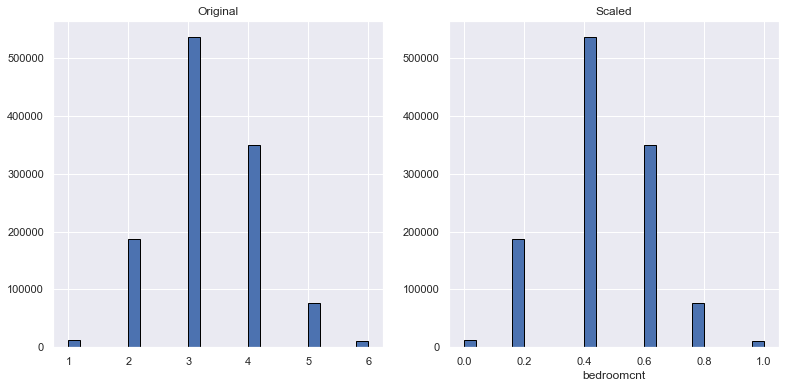

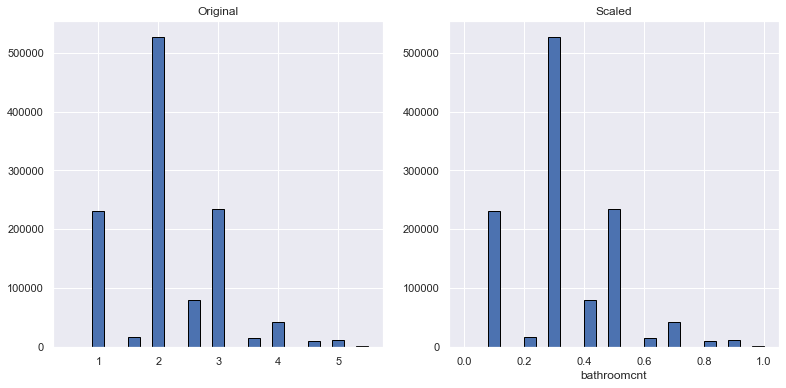

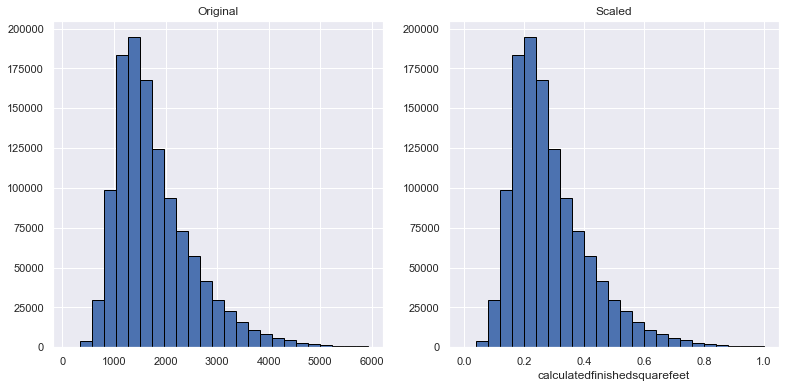

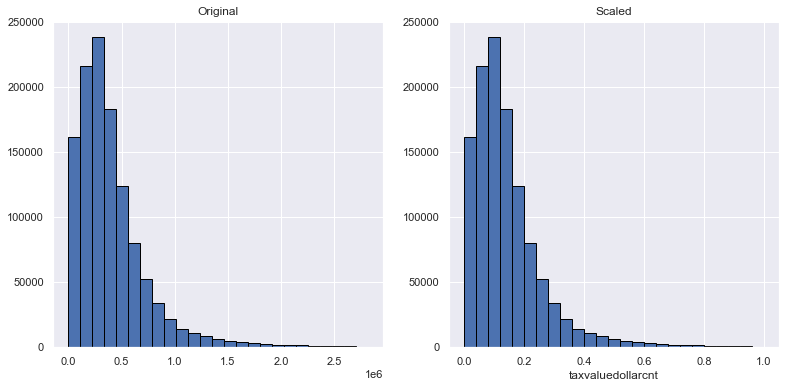

In [9]:
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']
train_scaled = train.copy() # makes a copy of train

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# we are creating a scaled dataset in addition to our unscaled original

train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

min_max_train, min_max_validate, min_max_test = fit_and_scale(scaler, train, validate, test)

#---------------------------------------------------------------------------------------------------------------------
for col in columns_to_scale:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(min_max_train[col], bins=25, ec='black')
    plt.title('Scaled')
    plt.xlabel(col)


***

### Standard Scaler

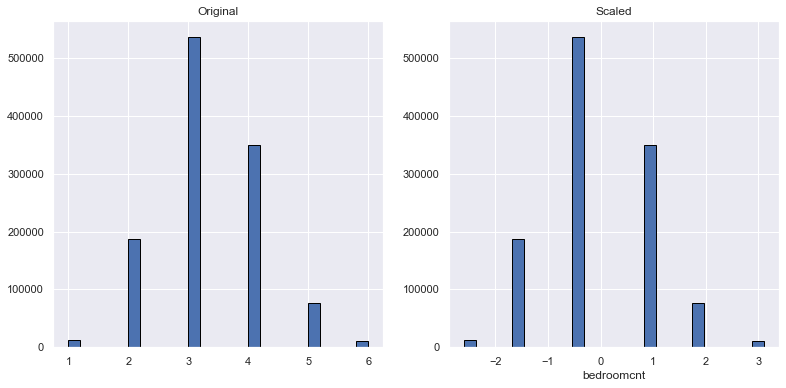

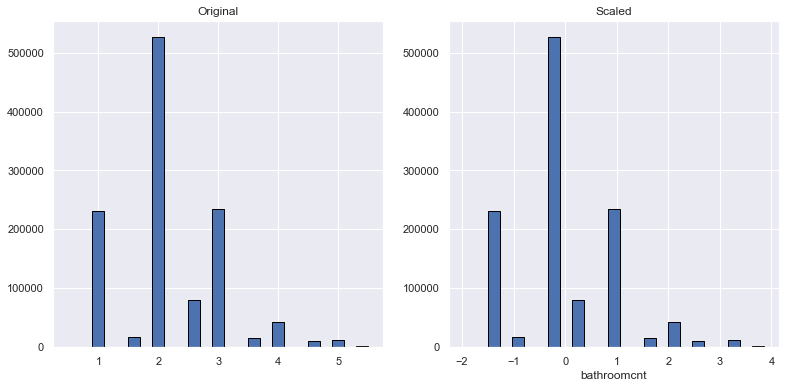

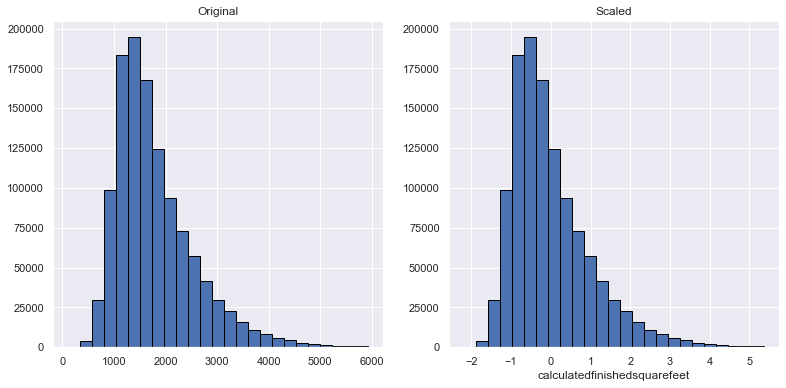

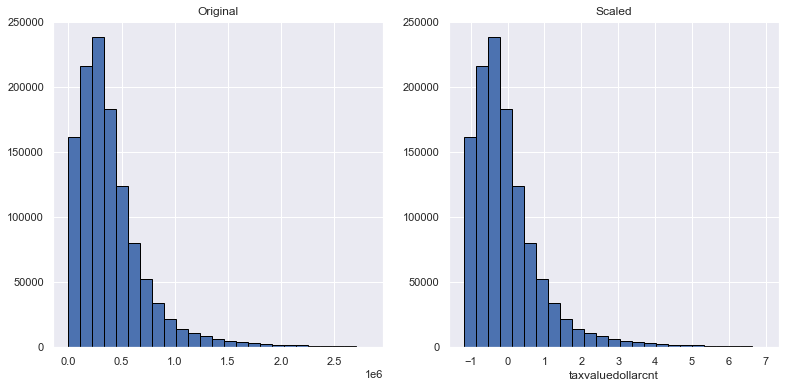

In [10]:
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']
train_scaled = train.copy() # makes a copy of train

scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# we are creating a scaled dataset in addition to our unscaled original

train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

min_max_train, min_max_validate, min_max_test = fit_and_scale(scaler, train, validate, test)

#---------------------------------------------------------------------------------------------------------------------
for col in columns_to_scale:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(min_max_train[col], bins=25, ec='black')
    plt.title('Scaled')
    plt.xlabel(col)

***

### Robust scaler 

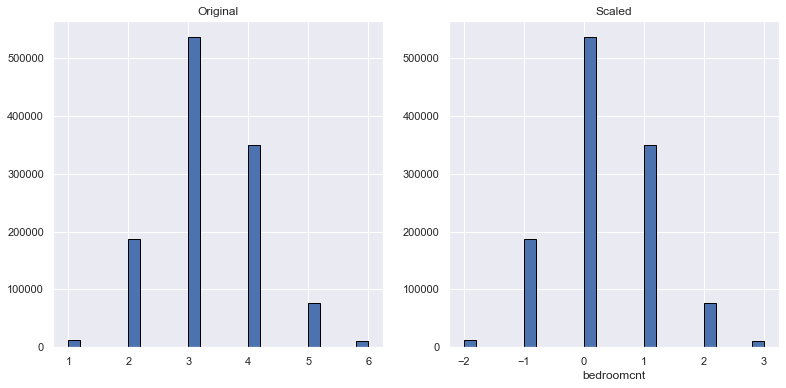

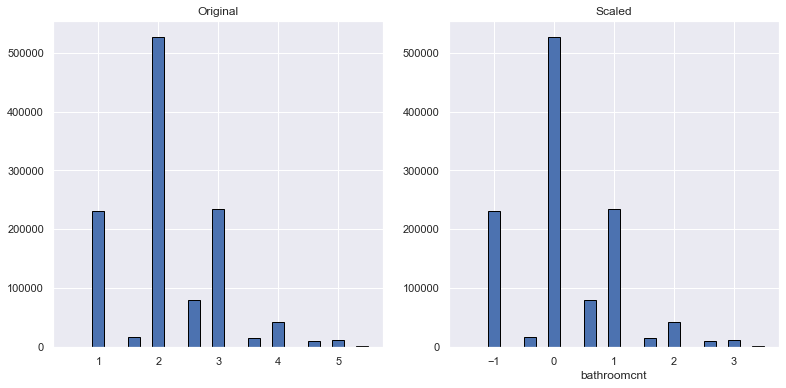

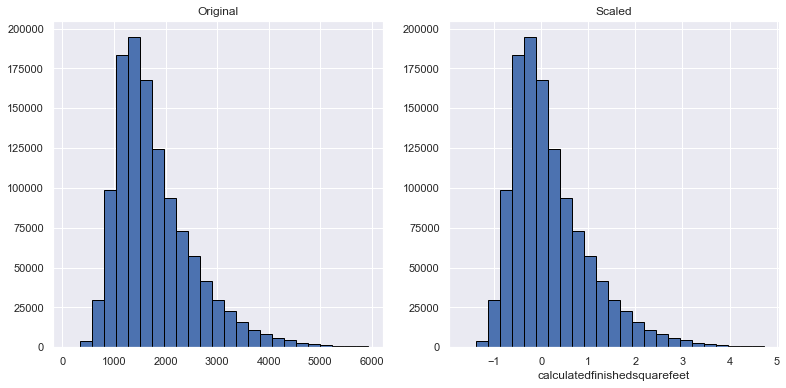

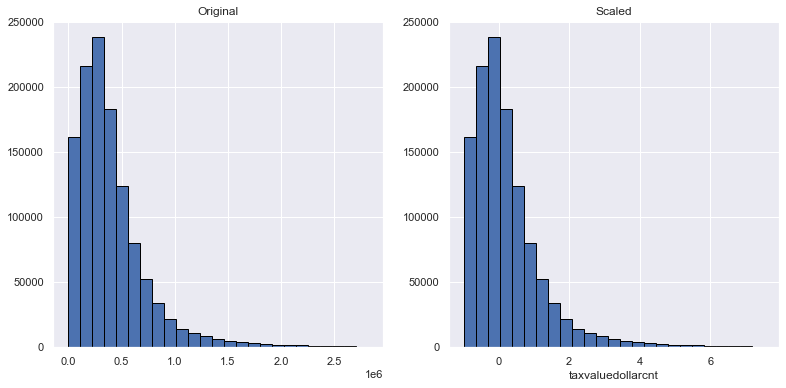

In [11]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# we are creating a scaled dataset in addition to our unscaled original

train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

min_max_train, min_max_validate, min_max_test = fit_and_scale(scaler, train, validate, test)

#---------------------------------------------------------------------------------------------------------------------
for col in columns_to_scale:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(min_max_train[col], bins=25, ec='black')
    plt.title('Scaled')
    plt.xlabel(col)

***

### 2)Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [12]:
scaler = sklearn.preprocessing.MinMaxScaler()
original_data = train[['taxvaluedollarcnt']]
scaled_data = scaler.fit_transform(original_data)

In [13]:
scaled_data[:3]

array([[0.15335942],
       [0.07492711],
       [0.13482273]])

In [14]:
(scaler.inverse_transform(scaled_data) == original_data)

,taxvaluedollarcnt
1349905,True
258766,True
1244806,True
667578,False
882530,True
...,...
728188,True
1285982,True
1929500,True
1770542,False


***

### 3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


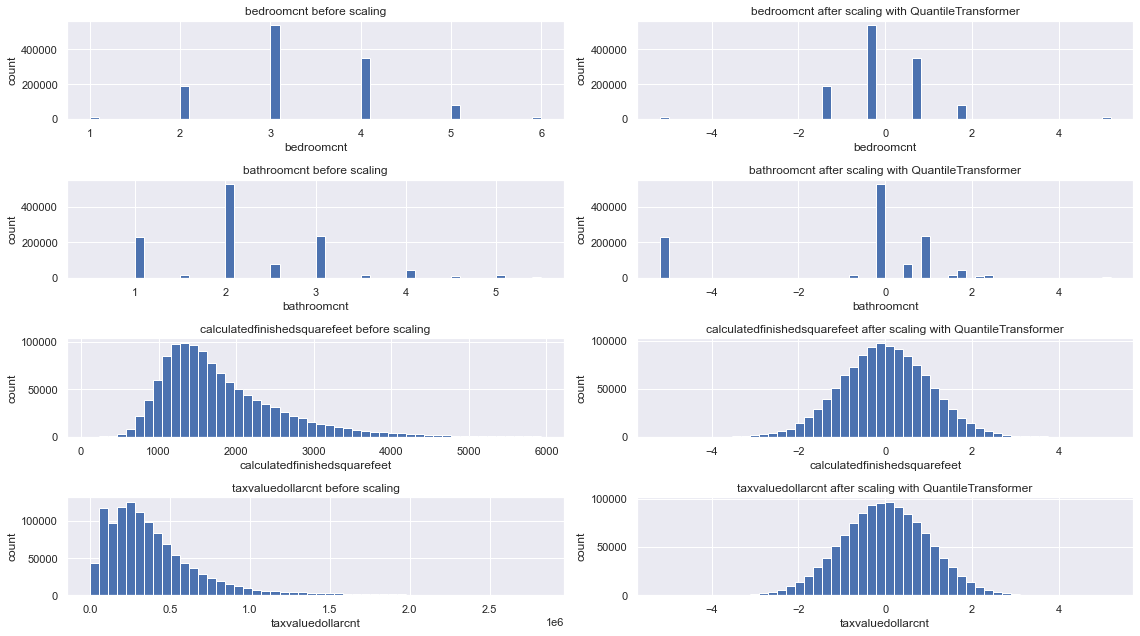

In [15]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=columns_to_scale, bins=50)

***

### 4) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


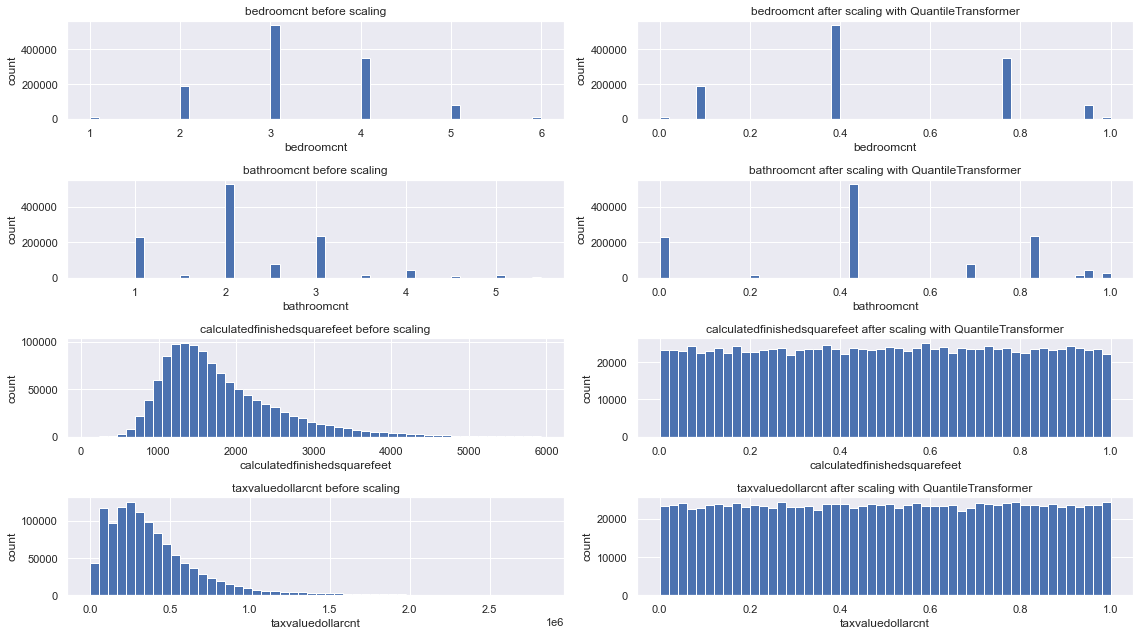

In [16]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(), df=train, columns_to_scale=columns_to_scale, bins=50)

***

### 5) Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

when in doubt use min max scaling 

In [17]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [18]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [19]:
train_scaled

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1349905,11911489,1.0,0.5,0.401032,0.153359,1947,5931.25,"Los Angeles,CA"
258766,17138706,0.4,0.3,0.254858,0.074927,1976,2261.32,"Ventura,CA"
1244806,12815284,0.6,0.5,0.318487,0.134823,1965,4570.03,"Los Angeles,CA"
667578,14105307,0.8,0.4,0.338435,0.071581,1955,2527.40,"Orange,CA"
882530,11010017,1.0,0.9,0.826311,0.392304,2002,13622.19,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...
728188,12823382,0.4,0.3,0.245572,0.116113,1951,4082.33,"Los Angeles,CA"
1285982,12199184,0.2,0.1,0.264660,0.011459,1909,940.08,"Los Angeles,CA"
1929500,11345782,0.6,0.5,0.417369,0.182170,1999,6987.84,"Los Angeles,CA"
1770542,12300227,0.6,0.5,0.411866,0.141719,1947,5213.92,"Los Angeles,CA"


In [20]:
validate_scaled

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1412298,11016387,0.4,0.3,0.298710,0.100298,1961,3601.36,"Los Angeles,CA"
1641778,12378229,0.2,0.5,0.178160,0.070385,1923,3309.64,"Los Angeles,CA"
334609,10763511,0.4,0.3,0.242992,0.077621,1951,2755.15,"Los Angeles,CA"
1444550,10994385,0.4,0.3,0.183319,0.157791,1951,5357.36,"Los Angeles,CA"
1598351,12238672,0.4,0.1,0.169733,0.013553,1953,961.10,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...
1438910,12869522,0.4,0.3,0.177300,0.168678,1952,5805.97,"Los Angeles,CA"
779459,12078574,0.6,0.7,0.493035,0.298743,1989,9256.81,"Los Angeles,CA"
791688,12484901,0.4,0.1,0.175580,0.025810,1950,1176.86,"Los Angeles,CA"
1243004,12250497,0.2,0.1,0.089940,0.015866,1921,722.00,"Los Angeles,CA"


In [21]:
test_scaled

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1489530,11756252,0.4,0.1,0.273775,0.161929,1923,5586.16,"Los Angeles,CA"
733304,10816182,0.6,0.5,0.392261,0.136297,1950,4737.45,"Los Angeles,CA"
162905,10846793,0.2,0.1,0.154256,0.031580,1948,1114.93,"Los Angeles,CA"
1637601,10797523,0.2,0.5,0.395357,0.283498,1954,9730.20,"Los Angeles,CA"
221776,12771827,0.6,0.3,0.316079,0.061748,1978,2405.11,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...
1668235,14328284,0.6,0.5,0.393809,0.302146,2004,11417.46,"Orange,CA"
1580991,14199403,0.4,0.3,0.268788,0.111861,1984,3906.66,"Orange,CA"
1305535,11317009,0.4,0.3,0.165606,0.050120,1992,2528.86,"Los Angeles,CA"
1408656,14145336,0.6,0.5,0.459501,0.057777,1962,2036.84,"Orange,CA"
